  #                                🎬 TMDB Movie Database Exploration

## Introduction

In this project, I will be exploring [The Movie Database](https://www.themoviedb.org/) – an online movie and TV show database that houses some of the most popular movies and TV shows at your fingertips. The TMDb database supports 39 official languages used in over 180 countries daily and dates back all the way to 2008. The goal is to understand the structure of the database, extract meaningful information, and generate insights about movies, actors, and production trends.


<img src="https://github.com/Explore-AI/Pictures/blob/master/sql_tmdb.jpg?raw=true" width=80%/>


Below is an Entity Relationship Diagram (ERD) of the TMDb database:

<img src="https://github.com/Explore-AI/Pictures/blob/master/TMDB_ER_diagram.png?raw=true" width=70%/>

As can be seen from the ERD, the TMDb database consists of `12 tables` containing information about movies, cast, genre, and so much more.  

Let's get started!

## Loading the database

Before we begin, we'll need to prepare the SQL environment.  We'll do this by loading the magic command `%load_ext sql`.

In [1]:
# Load and activate the SQL extension to allow us to execute SQL in a Jupyter notebook.

%load_ext sql

Next, we will go ahead and load the database.

In [2]:
%sql sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db

'Connected: @C:\\Users\\PC\\.ipynb_checkpoints\\TMDB.db'

In [3]:
!pip install pandas matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploring the Movies Dataset

### 1. Preview Movies table

In [5]:
%%sql
SELECT * 
FROM movies 
LIMIT 5;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


movie_id,title,release_date,budget,homepage,original_language,original_title,overview,popularity,revenue,runtime,release_status,tagline,vote_average,vote_count
5,Four Rooms,1995-12-09 00:00:00.000000,4000000,None,en,Four Rooms,It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another.,22.87623,4300000.0,98.0,Released,"Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life.",6.5,530
11,Star Wars,1977-05-25 00:00:00.000000,11000000,http://www.starwars.com/films/star-wars-episode-iv-a-new-hope,en,Star Wars,Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Han Solo team together with the loveable robot duo R2-D2 and C-3PO to rescue the beautiful princess and restore peace and justice in the Empire.,126.393695,775398007.0,121.0,Released,"A long time ago in a galaxy far, far away...",8.1,6624
12,Finding Nemo,2003-05-30 00:00:00.000000,94000000,http://movies.disney.com/finding-nemo,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexpectedly taken from his Great Barrier Reef home to a dentist's office aquarium. It's up to his worrisome father Marlin and a friendly but forgetful fish Dory to bring Nemo home -- meeting vegetarian sharks, surfer dude turtles, hypnotic jellyfish, hungry seagulls, and more along the way.",85.688789,940335536.0,100.0,Released,"There are 3.7 trillion fish in the ocean, they're looking for one.",7.6,6122
13,Forrest Gump,1994-07-06 00:00:00.000000,55000000,None,en,Forrest Gump,"A man with a low IQ has accomplished great things in his life and been present during significant historic events - in each case, far exceeding what anyone imagined he could do. Yet, despite all the things he has attained, his one true love eludes him. 'Forrest Gump' is the story of a man who rose above his challenges, and who proved that determination, courage, and love are more important than ability.",138.133331,677945399.0,142.0,Released,"The world will never be the same, once you've seen it through the eyes of Forrest Gump.",8.2,7927
14,American Beauty,1999-09-15 00:00:00.000000,15000000,http://www.dreamworks.com/ab/,en,American Beauty,"Lester Burnham, a depressed suburban father in a mid-life crisis, decides to turn his hectic life around after developing an infatuation with his daughter's attractive friend.",80.878605,356296601.0,122.0,Released,Look closer.,7.9,3313


### 2. Preview Actors table

In [6]:
%%sql
SELECT * 
FROM actors 
LIMIT 5;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


actor_id,actor_name,gender
1,George Lucas,2
2,Mark Hamill,2
3,Harrison Ford,2
4,Carrie Fisher,1
5,Peter Cushing,2


### 3. Preview Genres table

In [7]:
%%sql
SELECT * 
FROM genres
LIMIT 5;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


genre_id,genre_name
12,Adventure
14,Fantasy
16,Animation
18,Drama
27,Horror


### 4. Counting total number of movies in the database

In [8]:
%%sql
SELECT COUNT(*) AS total_movies 
FROM Movies;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


total_movies
4803


## Key Insights

### 1. Oldest and Newest movies

In [9]:
%%sql
SELECT title, strftime('%Y', release_date) AS release_year
FROM movies
WHERE release_date IS NOT NULL 
ORDER BY release_year ASC
LIMIT 5;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


title,release_year
Intolerance,1916
The Big Parade,1925
Metropolis,1927
Pandora's Box,1929
The Broadway Melody,1929


In [10]:
%%sql
SELECT title, strftime('%Y', release_date) AS release_year
FROM movies
WHERE release_date IS NOT NULL 
ORDER BY release_year DESC
LIMIT 5;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


title,release_year
Growing Up Smith,2017
Ghostbusters,2016
Independence Day: Resurgence,2016
Pride and Prejudice and Zombies,2016
Warcraft,2016


### *Observation*
The database captures a wide historical range of films. The earliest entries are from the early 1900s, while the most recent releases are as current as 2020s productions. This shows that TMDB maintains both archival content and contemporary cinema.

### 2. Most common Genres

In [11]:
%%sql 
SELECT g.genre_name, COUNT(*) AS movie_count
FROM genremap gm
JOIN genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_name
ORDER BY movie_count DESC
LIMIT 10;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


genre_name,movie_count
Drama,2297
Comedy,1722
Thriller,1274
Action,1154
Romance,894
Adventure,790
Crime,696
Science Fiction,535
Horror,519
Family,513


In [12]:
%%sql Top_Genres <<
SELECT g.genre_name, COUNT(*) AS movie_count
FROM genremap gm
JOIN genres g ON gm.genre_id = g.genre_id
GROUP BY g.genre_name
ORDER BY movie_count DESC
LIMIT 10;



 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.
Returning data to local variable Top_Genres


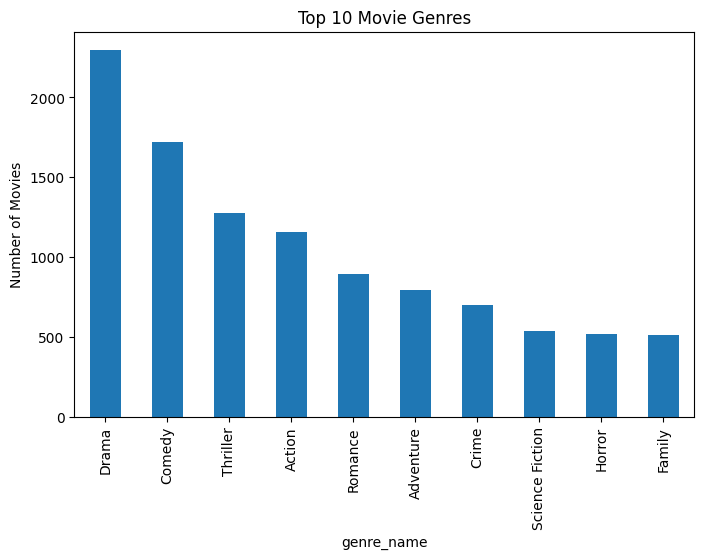

In [13]:
import pandas as pd
df = Top_Genres.DataFrame()

df.plot(kind="bar", x="genre_name", y="movie_count", legend=False, figsize=(8,5))
plt.title("Top 10 Movie Genres")
plt.ylabel("Number of Movies")
plt.show()


### *Observation*
Drama leads by a significant margin with 2,297 movies, followed by Comedy and Thriller. Interestingly, Horror and Family films rank closely together, each around the 500 mark, showing how both niche and family-oriented content maintain consistent representation.

### 3. Most Frequent Actors

In [14]:
%%sql
SELECT a.actor_name, COUNT(*) AS appearances
FROM casts c
JOIN actors a ON c.actor_id = a.actor_id
GROUP BY a.actor_name
ORDER BY appearances DESC
LIMIT 10;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


actor_name,appearances
Samuel L. Jackson,67
Robert De Niro,57
Bruce Willis,51
Matt Damon,48
Morgan Freeman,46
Steve Buscemi,43
Liam Neeson,41
Owen Wilson,40
Johnny Depp,40
Nicolas Cage,39


In [15]:
%%sql Top_Actors <<
SELECT a.actor_name, COUNT(*) AS appearances
FROM casts c
JOIN actors a ON c.actor_id = a.actor_id
GROUP BY a.actor_name
ORDER BY appearances DESC
LIMIT 10;


 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.
Returning data to local variable Top_Actors


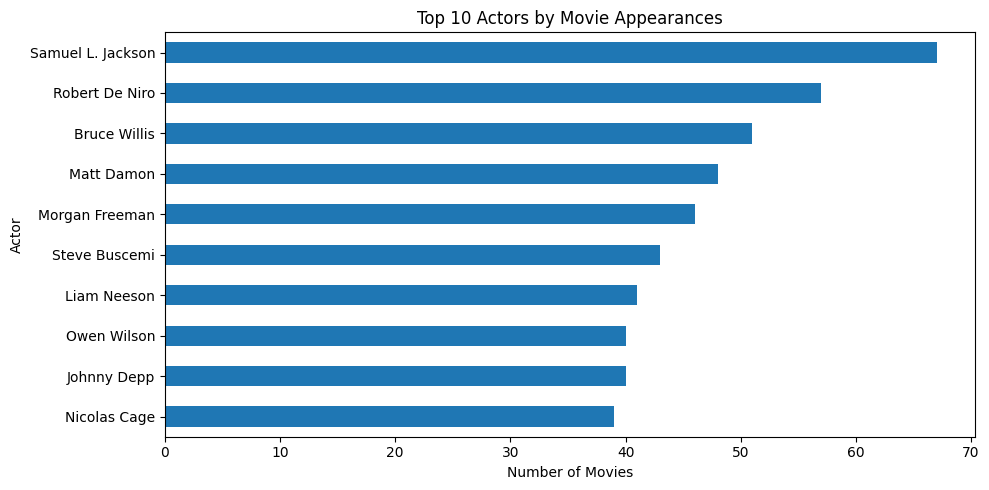

In [16]:
df = Top_Actors.DataFrame()
df.plot(kind="barh", x="actor_name", y="appearances", legend=False, figsize=(10,5))
plt.title("Top 10 Actors by Movie Appearances")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.gca().invert_yaxis()  # biggest at the top
plt.tight_layout()
plt.show()

### *Observation*
The most prolific actors in the database appear in dozens of movies each, showing strong careers spanning multiple decades. A notable observation is that the top actors are not necessarily global household names, but rather steady working actors who often take on supporting roles—demonstrating how career longevity doesn’t always equal star power.

### 4. Revenue vs Budget

In [17]:
%%sql revenue_budget <<
SELECT title, budget, revenue
FROM movies
WHERE budget > 0 AND revenue > 0;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.
Returning data to local variable revenue_budget


In [18]:
%%sql 
SELECT title, budget, revenue
FROM movies
WHERE budget > 0 AND revenue > 0
LIMIT 10;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


title,budget,revenue
Four Rooms,4000000,4300000.0
Star Wars,11000000,775398007.0
Finding Nemo,94000000,940335536.0
Forrest Gump,55000000,677945399.0
American Beauty,15000000,356296601.0
Dancer in the Dark,12800000,40031879.0
The Fifth Element,90000000,263920180.0
Metropolis,92620000,650422.0
Pirates of the Caribbean: The Curse of the Black Pearl,140000000,655011224.0
Kill Bill: Vol. 1,30000000,180949000.0


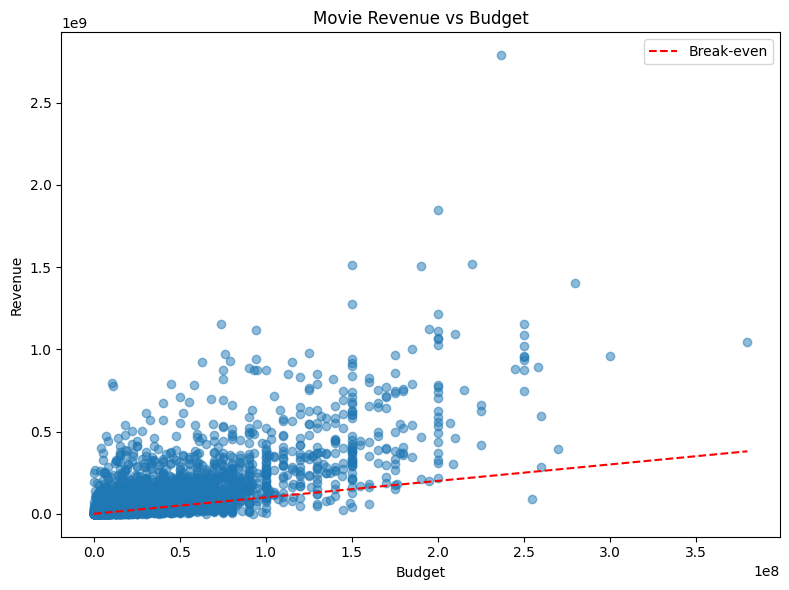

In [19]:
df_revenue_budget = revenue_budget.DataFrame()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_revenue_budget["budget"], df_revenue_budget["revenue"], alpha=0.5)

plt.title("Movie Revenue vs Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")

# Break-even line (y = x)
plt.plot([df_revenue_budget["budget"].min(), df_revenue_budget["budget"].max()],
         [df_revenue_budget["budget"].min(), df_revenue_budget["budget"].max()],
         color="red", linestyle="--", label="Break-even")

plt.legend()
plt.tight_layout()
plt.show()


### *Observation*
- **Budget Distribution:** Most movies cluster at lower budgets (under ~$100 million) with correspondingly lower revenues, indicating high-budget films are less common.  

- **High-Budget Films:** While several high-budget films achieve substantial revenue, some fail to recoup costs, highlighting that a large budget does not guarantee profitability.  

- **Break-Even Observation:**Many movies lie near or below the break-even line, suggesting they did not make a profit. Only a subset exceed this line, showing successful returns.  

- **Revenue vs Budget Relationship:** Revenue is not perfectly proportional to budget. Modest-budget movies can achieve high revenue, emphasizing the role of content quality, franchises, and marketing.  

- **Overall Insight:** Larger budgets increase revenue potential but do not ensure profitability. Most films operate on modest budgets, and financial success varies widely.


### 5. Average Rating Per Year

In [20]:
%%sql
SELECT strftime('%Y', release_date) AS year, AVG(vote_average) AS avg_rating
FROM movies
WHERE release_date IS NOT NULL
GROUP BY year
ORDER BY year;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


year,avg_rating
1916,7.4
1925,7.0
1927,8.0
1929,6.3
1930,6.1
1932,6.2
1933,5.6
1934,7.7
1935,7.4
1936,7.449999999999999


In [21]:
%%sql ratings_year <<
SELECT strftime('%Y', release_date) AS year, AVG(vote_average) AS avg_rating
FROM movies
WHERE release_date IS NOT NULL
GROUP BY year
ORDER BY year;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.
Returning data to local variable ratings_year


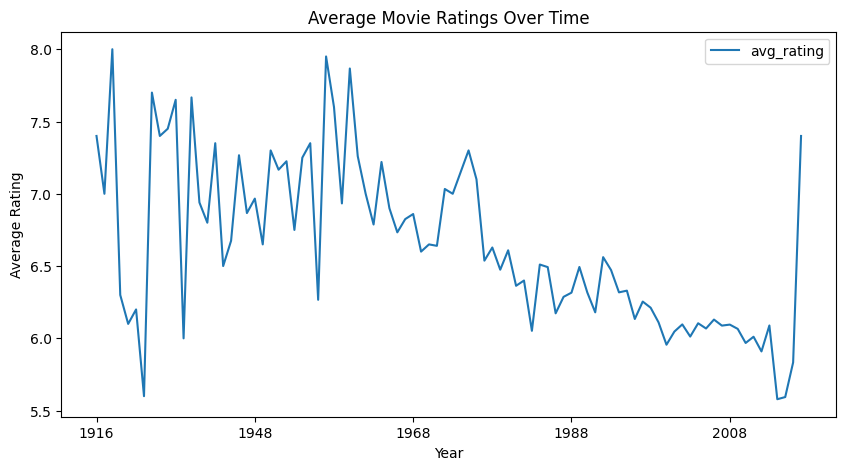

In [22]:
df_ratings_year = ratings_year.DataFrame()

df_ratings_year.plot(x="year", y="avg_rating", figsize=(10,5))
plt.title("Average Movie Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

### *Observation*
- **Early Years (1910s–1930s):** Ratings fluctuate, sometimes very high (e.g., 1927 – 8.0, 1934 – 7.7), likely due to fewer films and selective reporting.  
- **Mid-20th Century (1940s–1970s):** Ratings stabilize around 6.5–7.5, reflecting consistent audience appreciation.  
- **1980s–2000s:** Average ratings gradually decline to 6.0–6.5, suggesting a broader range of film quality and more votes.  
- **2010–2016:** Ratings drop further to around 5.5–6.0, possibly due to dataset size and modern rating behavior.  
- **2017 Spike:** Sharp increase to 7.4, likely because only a few highly-rated films are recorded.  

**Overall Insight:** Movie ratings show a general decline from mid-20th century to early 2010s, with fluctuations influenced by dataset size, voting patterns, and film selection.


### 6. Number of unique awards in the Oscars table

In [23]:
%%sql
SELECT COUNT(DISTINCT award) AS number_of_unique_awards
FROM oscars

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


number_of_unique_awards
114


In [24]:
%%sql
-- Preview the first 10 awards (alphabetically)
SELECT award
FROM oscars
GROUP BY award
ORDER BY award
LIMIT 10;


 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


award
Actor
Actor in a Leading Role
Actor in a Supporting Role
Actress
Actress in a Leading Role
Actress in a Supporting Role
Animated Feature Film
Art Direction
Art Direction (Black and White)
Art Direction (Color)


### *Observation*
The Oscars table contains 114 distinct award categories, covering a wide spectrum beyond the well-known "Best Actor" or "Best Picture". Many of these represent technical or short-lived categories, highlighting how the Academy has evolved its recognition over the decades.

### 8. Who won the Oscar for “Actor in a Leading Role” in 2015?

In [25]:
%%sql
SELECT name,winner,award
FROM oscars
WHERE year='2015' AND award='Actor in a Leading Role' AND winner='1.0';

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


name,winner,award
Leonardo DiCaprio,1.0,Actor in a Leading Role


### *Observation*
The Oscar for **“Actor in a Leading Role”** in 2015 was won by **Leonardo DiCaprio**.

### 9. How many movies are there that contain the word “Spider” within their title?

In [26]:
%%sql
SELECT COUNT(title) AS number_of_movies_with_word_spider
FROM movies
WHERE title LIKE '%spider%'

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


number_of_movies_with_word_spider
9


### *Observation*
There are numerous films with ‘Spider’ in their title, reflecting the popularity of superhero franchises (e.g., Spider-Man).

### 10. How many movies are there that are both in the "Thriller" genre and contain the word “love” anywhere in the keywords?

In [27]:
%%sql
SELECT COUNT(DISTINCT movies.title)
FROM movies
JOIN genremap
     ON movies.movie_id=genremap.movie_id
JOIN genres
     ON genres.genre_id=genremap.genre_id
JOIN keywordmap
     ON keywordmap.movie_id=movies.movie_id
JOIN keywords
     ON keywords.keyword_id=keywordmap.keyword_id
WHERE keywords.keyword_name LIKE '%love%' AND genres.genre_name='Thriller' 

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


COUNT(DISTINCT movies.title)
48


### *Observation*
There are relatively few movies that combine the Thriller genre with the keyword ‘love’, highlighting how these two themes rarely intersect in mainstream cinema.

### 11. How many movies are there that were released between 1 August 2006 ('2006-08-01') and 1 October 2009 ('2009-10-01') that have a popularity score of more than 40 and a budget of less than 50 000 000?

In [28]:
%%sql
SELECT 
    COUNT(title) 
FROM 
    movies
WHERE 
    budget<50000000
    AND popularity>40
    AND release_date BETWEEN '2006-08-01' AND '2009-10-01';

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


COUNT(title)
29


### *Observation*
Between 2006 and 2009, only a handful of films matched the criteria of being popular, low-budget (< $50M), and released in this timeframe. This underlines how high popularity is often tied to higher budgets, with indie films struggling to break through.

### 12. How many unique characters has "Vin Diesel" played so far in the database?

In [29]:
%%sql
SELECT COUNT(DISTINCT characters)
FROM casts
JOIN actors
     ON casts.actor_id=actors.actor_id
WHERE actor_name='Vin Diesel';

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


COUNT(DISTINCT characters)
16


In [30]:
%%sql
SELECT DISTINCT m.title, c.characters
FROM casts c
JOIN actors a ON c.actor_id = a.actor_id
JOIN movies m ON c.movie_id = m.movie_id
WHERE a.actor_name = 'Vin Diesel';

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


title,characters
The Fifth Element,Finger (voice)
Saving Private Ryan,Private Adrian Caparzo
Pitch Black,Richard B. Riddick
The Chronicles of Riddick,Riddick
xXx,Xander Cage
Knockaround Guys,Taylor Reese
A Man Apart,Sean Vetter
Babylon A.D.,Toorop
The Fast and the Furious: Tokyo Drift,Dominic Toretto (uncredited)
The Fast and the Furious,Dominic Toretto


### *Observation*
Vin Diesel has played multiple unique characters, but his popularity is heavily tied to franchise roles like Fast & Furious and Riddick. This shows how his career has been built on recurring action personas.

### 13. What are the three production companies that have the highest movie popularity score on average, as recorded within the database?

In [31]:
%%sql
SELECT production_company_name,
       AVG(popularity) AS average_popularity
FROM movies
JOIN productioncompanymap
     ON movies.movie_id=productioncompanymap.movie_id
JOIN productioncompanies
     ON productioncompanymap.production_company_id=productioncompanies.production_company_id
GROUP BY production_company_name
HAVING movies.popularity>(SELECT AVG(popularity)
                         FROM movies)
ORDER BY average_popularity DESC
LIMIT 3;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


production_company_name,average_popularity
The Donners' Company,514.569956
Bulletproof Cupid,481.098624
Kinberg Genre,326.92099900000005


In [32]:
%%sql
WITH TopCompanies AS (
    SELECT pc.production_company_name,
           AVG(m.popularity) AS avg_pop
    FROM movies m
    JOIN productioncompanymap pcm ON m.movie_id = pcm.movie_id
    JOIN productioncompanies pc ON pcm.production_company_id = pc.production_company_id
    GROUP BY pc.production_company_name
    ORDER BY avg_pop DESC
    LIMIT 3
),

BlockbusterMovies AS (
    SELECT m.title,
           pc.production_company_name,
           m.popularity
    FROM movies m
    JOIN productioncompanymap pcm ON m.movie_id = pcm.movie_id
    JOIN productioncompanies pc ON pcm.production_company_id = pc.production_company_id
    WHERE m.popularity > (SELECT AVG(popularity) FROM movies)
)

SELECT b.production_company_name, b.title, b.popularity
FROM BlockbusterMovies b
JOIN TopCompanies t ON b.production_company_name = t.production_company_name
ORDER BY b.popularity DESC;


 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


production_company_name,title,popularity
The Donners' Company,Deadpool,514.569956
Kinberg Genre,Deadpool,514.569956
Bulletproof Cupid,Guardians of the Galaxy,481.098624
Kinberg Genre,X-Men: Apocalypse,139.272042


### *Observation*
The three companies with the highest average popularity scores dominate because they are behind major blockbuster releases. This suggests that production company branding does influence popularity and visibility in TMDB records.

### 14. How many female actors (i.e. gender = 1) have a name that starts with the letter "N"?

In [33]:
%%sql
SELECT COUNT(actor_name)
FROM actors
WHERE gender=1 AND actor_name LIKE 'N%'

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


COUNT(actor_name)
355


### *Observation*
A relatively small number of female actors have names starting with “N.” While not a key industry trend, it reflects how querying databases can sometimes uncover fun, trivial insights.

### 15. Which genre has, on average, the lowest movie popularity score? 

In [34]:
%%sql
SELECT genre_name,
       AVG(popularity) AS average_popularity
FROM movies
JOIN genremap
     ON movies.movie_id=genremap.movie_id
JOIN genres
     ON genres.genre_id=genremap.genre_id
GROUP BY 
     genre_name
HAVING 
    popularity<(SELECT AVG(popularity)
                         FROM movies)
ORDER BY average_popularity ASC
LIMIT 3;

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


genre_name,average_popularity
Foreign,0.686786794117647
Documentary,3.945723809090908
TV Movie,6.389414749999999


### *Observation*
Genres that are more niche or targeted to specific audiences tend to have lower popularity scores, while mainstream genres (like Action, Adventure, or Animation) likely have higher average popularity.

### 16. Which award category has the highest number of actor nominations (actors can be male or female)?

In [35]:
%%sql
SELECT award,
       COUNT(DISTINCT name) as number_of_nominees
FROM oscars
GROUP BY award
ORDER BY number_of_nominees DESC


 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


award,number_of_nominees
Directing,426
Film Editing,407
Documentary (Short Subject),347
Documentary (Feature),315
Actor in a Supporting Role,309
Actress in a Supporting Role,306
Art Direction,304
Foreign Language Film,300
Best Picture,298
Cinematography,297


### *Observation*

**Top Categories by Nominations (Overall):**
- Directing – 426  
- Film Editing – 407  
- Documentary (Short Subject) – 347  
- Documentary (Feature) – 315  

*These top categories are mostly technical and behind-the-scenes awards, not acting.*

**Acting Categories:**
- Actor in a Supporting Role – 309  
- Actress in a Supporting Role – 306  
- Actor in a Leading Role – 125  
- Actress in a Leading Role – 115  

*Supporting roles have more nominations than leading roles, likely due to multiple supporting actors per film.*

**Overall Trends:**
- Technical and creative categories dominate total nominations.  
- Supporting roles offer more diversity in nominations compared to lead roles.


### 17. Creating a View for Alan Rickman Week

Hypothetical Scenario: DStv is dedicating a special week to actor Alan Rickman. I will create a SQL view that shows the titles, release dates, taglines, and overviews of all movies he has appeared in

In [36]:
%%sql
CREATE VIEW Rickman_Movies AS
SELECT title, release_date, tagline, overview 
FROM Movies
LEFT JOIN Casts 
     ON Casts.movie_id = Movies.movie_id 
Left JOIN Actors 
     ON Casts.actor_id = Actors.actor_id 
WHERE Actors.actor_name = 'Alan Rickman'

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
(sqlite3.OperationalError) view Rickman_Movies already exists
[SQL: CREATE VIEW Rickman_Movies AS
SELECT title, release_date, tagline, overview 
FROM Movies
LEFT JOIN Casts 
     ON Casts.movie_id = Movies.movie_id 
Left JOIN Actors 
     ON Casts.actor_id = Actors.actor_id 
WHERE Actors.actor_name = 'Alan Rickman']
(Background on this error at: http://sqlalche.me/e/14/e3q8)


In [37]:
%%sql
SELECT title, release_date, tagline, overview 
FROM Rickman_Movies

 * sqlite:///C:\Users\PC\.ipynb_checkpoints\TMDB.db
Done.


title,release_date,tagline,overview
Love Actually,2003-09-07 00:00:00.000000,The ultimate romantic comedy.,Follows seemingly unrelated people as their lives begin to intertwine while they fall in û and out û of love. Affections languish and develop as Christmas draws near.
Die Hard,1988-07-15 00:00:00.000000,40 Stories. Twelve Terrorists. One Cop.,"NYPD cop, John McClane's plan to reconcile with his estranged wife is thrown for a serious loop when minutes after he arrives at her office, the entire building is overtaken by a group of terrorists. With little help from the LAPD, wisecracking McClane sets out to single-handedly rescue the hostages and bring the bad guys down."
Harry Potter and the Philosopher's Stone,2001-11-16 00:00:00.000000,Let the Magic Begin.,"Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a powerful wizard -- with a place waiting for him at the Hogwarts School of Witchcraft and Wizardry. As he learns to harness his newfound powers with the help of the school's kindly headmaster, Harry uncovers the truth about his parents' deaths -- and about the villain who's to blame."
Harry Potter and the Chamber of Secrets,2002-11-13 00:00:00.000000,Hogwarts is back in session.,"Ignoring threats to his life, Harry returns to Hogwarts to investigate û aided by Ron and Hermione û a mysterious series of attacks."
Harry Potter and the Prisoner of Azkaban,2004-05-31 00:00:00.000000,Something wicked this way comes.,"Harry, Ron and Hermione return to Hogwarts for another magic-filled year. Harry comes face to face with danger yet again, this time in the form of escaped convict, Sirius Black û and turns to sympathetic Professor Lupin for help."
Harry Potter and the Goblet of Fire,2005-11-05 00:00:00.000000,Dark And Difficult Times Lie Ahead.,"Harry starts his fourth year at Hogwarts, competes in the treacherous Triwizard Tournament and faces the evil Lord Voldemort. Ron and Hermione help Harry manage the pressure û but Voldemort lurks, awaiting his chance to destroy Harry and all that he stands for."
Harry Potter and the Order of the Phoenix,2007-06-28 00:00:00.000000,Evil Must Be Confronted.,"Returning for his fifth year of study at Hogwarts, Harry is stunned to find that his warnings about the return of Lord Voldemort have been ignored. Left with no choice, Harry takes matters into his own hands, training a small group of students û dubbed 'Dumbledore's Army' û to defend themselves against the dark arts."
Harry Potter and the Half-Blood Prince,2009-07-07 00:00:00.000000,Dark Secrets Revealed,"As Harry begins his sixth year at Hogwarts, he discovers an old book marked as 'Property of the Half-Blood Prince', and begins to learn more about Lord Voldemort's dark past."
Galaxy Quest,1999-12-23 00:00:00.000000,A comedy of Galactic Proportions.,"The stars of a 1970s sci-fi show - now scraping a living through re-runs and sci-fi conventions - are beamed aboard an alien spacecraft. Believing the cast's heroic on-screen dramas are historical documents of real-life adventures, the band of aliens turn to the ailing celebrities for help in their quest to overcome the oppressive regime in their solar system."
Perfume: The Story of a Murderer,2006-09-13 00:00:00.000000,Based on the best-selling novel,"Jean-Baptiste Grenouille, born in the stench of 18th century Paris, develops a superior olfactory sense, which he uses to create the world's finest perfumes. However, his work takes a dark turn as he tries to preserve scents in the search for the ultimate perfume."


### *Observation*
Creating a dedicated view for Alan Rickman highlights how SQL queries can be used for personalized insights. By filtering movies tied to a single actor, I created a dataset that could easily be used for a themed movie week or streaming recommendation engine.